In [ ]:
import pandas as pd
#data path:https://drive.google.com/file/d/1NpxhnjwoRPtVEVtccFc3gteO9JdT1AhL/view

# Read the CSV file located at the given path into a DataFrame
df = pd.read_csv("F:\programming\machine learning\creditcard.csv")  

print(df)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [57]:
from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets
import numpy as np  
from sklearn.preprocessing import StandardScaler  # Import scaler to normalize feature data

    
X = df.iloc[:, 1:-1]  # Select all columns except the first and the last as features
Y = df.iloc[:, -1]    # Select the last column as the target variable

X = StandardScaler().fit_transform(X)  # Scale the feature matrix (zero mean, unit variance)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  # Split data into 80% training, 20% testing

X_train = np.array(X_train)  # Convert training features to NumPy array
X_test = np.array(X_test)    # Convert test features to NumPy array
y_train = np.array(y_train)  # Convert training labels to NumPy array
y_test = np.array(y_test)    # Convert test labels to NumPy array



In [58]:
scaler = StandardScaler().fit(X_train)#scale data
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])#add bias 
X_test  = np.hstack([np.ones((X_test.shape[0], 1)),  X_test])

In [59]:
# Define a custom loss function
def loss(Y, W, X):
    # Computes the loss as the sum of squared errors weighted by cos(Y)
    # Y: true labels (1D array)
    # W: weights (1D array)
    # X: input features (2D array)
    
    # Compute predictions: X @ W
    # Subtract predictions from true values, square the error, and multiply by cos(Y)
    return np.mean(((Y - (X @ W)) ** 2) * np.cos(Y))


# Define the gradient of the loss function with respect to weights W
def loss_Grad(Y, W, X):
    A = []  # Initialize an empty list to store gradients for each weight
    
    for i in range(X.shape[1]):  # Loop over each feature (assumes X has 29 columns)
        # Compute partial derivative of the loss with respect to W[i]
        # This is: -2 * X[:, i] * (Y - prediction) * cos(Y)
        # The sum computes the total gradient for weight i
        A.append(np.sum(-2 * X[:, i] * (Y - (X @ W)) * np.cos(Y))/X.shape[0])
    
    return np.array(A)  # Convert the list of gradients to a NumPy array


In [60]:
import matplotlib.pyplot as plt  

# Gradient Descent Function
def GD(X, Y, etha, iteration, X2, Y2):
    loss1 = []  # Training loss history
    loss2 = []  # Test/validation loss history
    it = []     # Epoch counter

    W = np.random.rand(X.shape[1]) * 0.01  # Initialize weights randomly (small values), assuming 29 features

    for j in range(iteration):
        # Update weights using gradient descent
        W -= etha * loss_Grad(Y, W, X)

        # Record loss after update
        loss1.append(loss(Y, W, X))     # Training loss
        loss2.append(loss(Y2, W, X2))   # Test loss
        it.append(j)                    # Epoch number

    return W, loss1, it, loss2  # Return final weights and loss history

# Run gradient descent with learning rate 0.0001, for 100 iterations
A = GD(X_train, y_train, 0.001, 400, X_test, y_test)


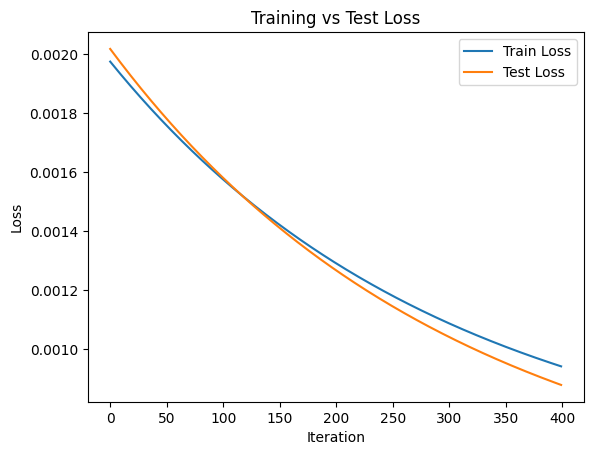

In [61]:
# Plot training loss over iterations
plt.plot(A[2], A[1], label="Train Loss")

# Plot test loss over iterations
plt.plot(A[2], A[3], label="Test Loss")

# Show the plot
plt.xlabel("Iteration")         
plt.ylabel("Loss")              
plt.title("Training vs Test Loss")  # Plot title
plt.legend()                    
plt.show()                      # Display the plot
